In [2]:
##imports

import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

roc_curve = RocCurveDisplay.from_estimator

## 9.6.1 Support Vector Classifier

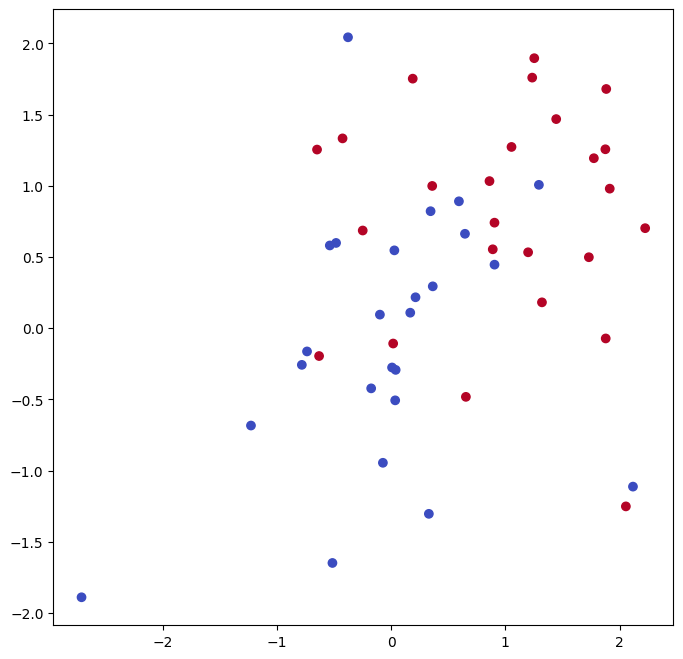

In [3]:
## Begin by generating the observations, which belong to two classes, and check whether they are linearly seperable.
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm)



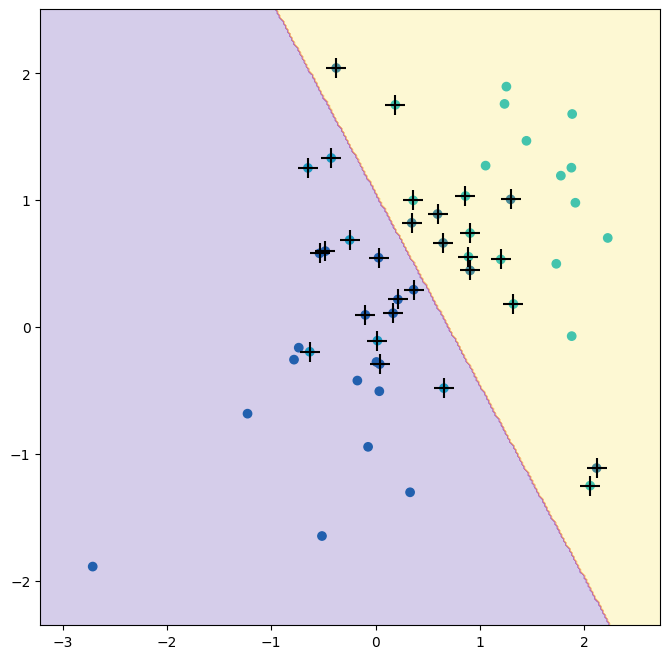

In [4]:
## Decision Boundary is linear
## Support vectors are marked with the + 

svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear,
ax=ax)

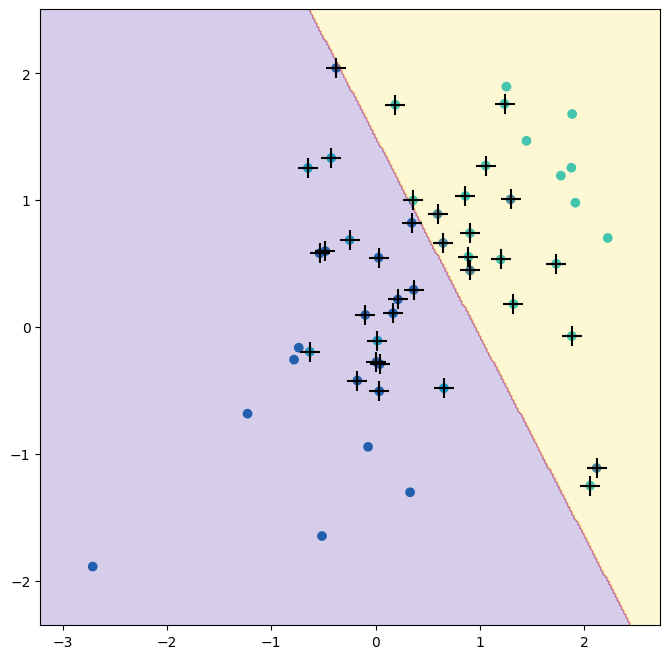

In [5]:
## What if we used a smaller value for the cost parameter
## With a smaller C we get more support vectors because the margin is now wider

svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear_small,
ax=ax)

In [6]:
## Extract the coefficients of the linear decision boundary
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [7]:
## Here we tune it using 5-fold CV, to find a proper value for C

kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_linear,
{'C':[0.001,0.01,0.1,1,5,10,100]},
refit=True,
cv=kfold,
scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [8]:
## Get the cross-validation errors for each fo these models 
## C=1 is best 

grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [9]:
## Generate some test observations to predict class label using this best_estimator from grid search

X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1

In [10]:
## Predict class labels on these test observations 
## 70% of test observations are correctly classified

best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


In [11]:
## what if we used C=0.001?
## 60% of observations classified correctly

svm_ = SVC(C=0.001,
kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,2,0
1,8,10


- Now Consider a situation where the two classes are linearly separable.

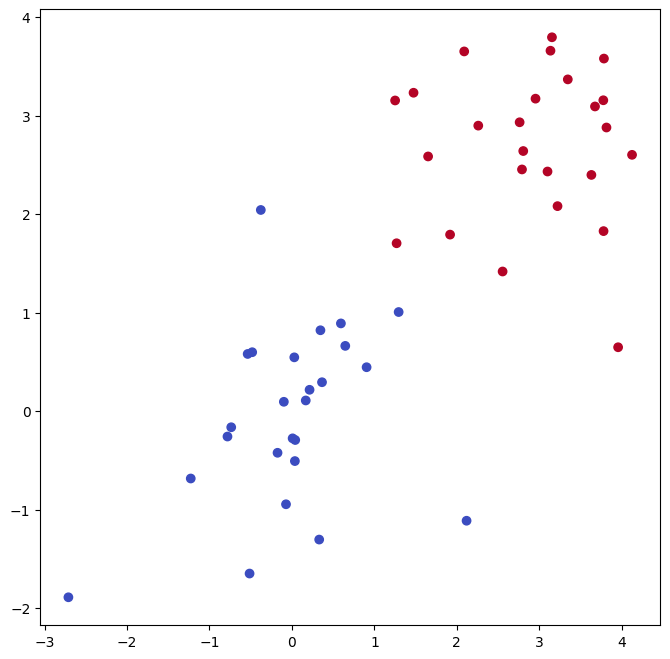

In [12]:
X[y==1] += 1.9;
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [13]:
## Fit the classifier with a very large C, meaning our margin will widen as we become more tolerable to violations 

svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


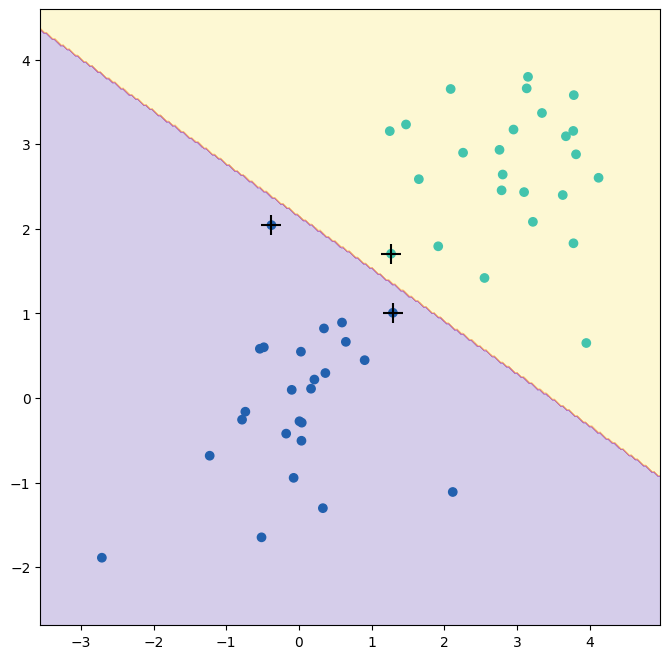

In [14]:
## No training errors are made. Only 3 support vectors are used
## large value of C means that these 3 support points are on the margin and define it 

fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_,
ax=ax)

In [15]:
## With a smaller value of C

svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


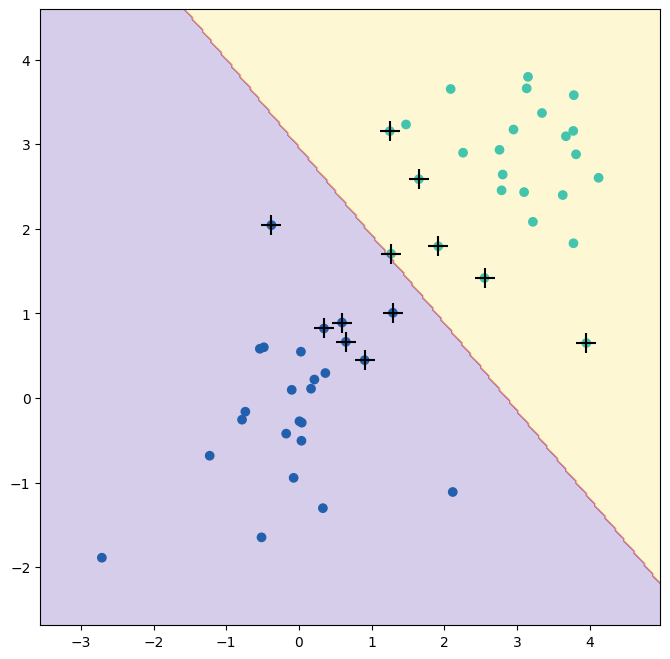

In [16]:
## Still no misclassifications, but we also obtain a much wider margin and make use of twelve support vecotrs
## They jointly define the decision boundary, and since there are more of them it could be more stable. 

fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_,
ax=ax)

## 9.6.2 Support Vector Machine

In [17]:
## Going to use a non-linear kernel 
## Use the degree argument to specify a degree for the polynomial 

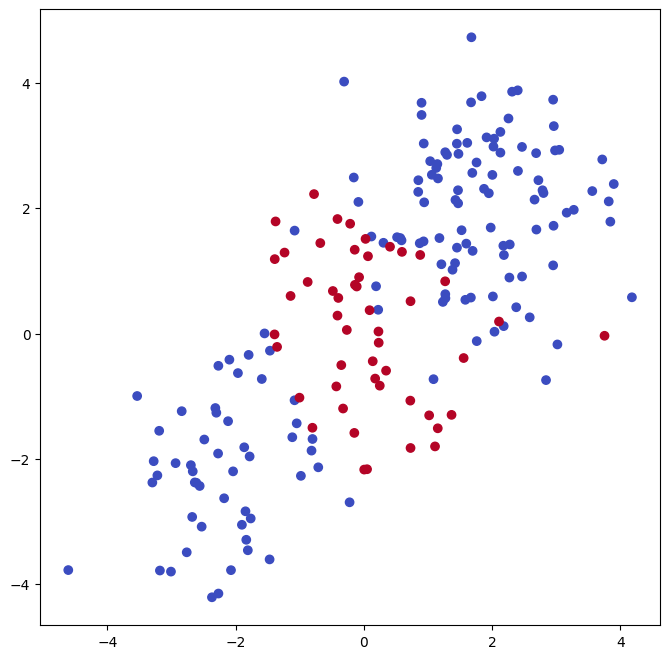

In [19]:
## Generate Data for a non-linear class boundary
## Then plot

X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm)

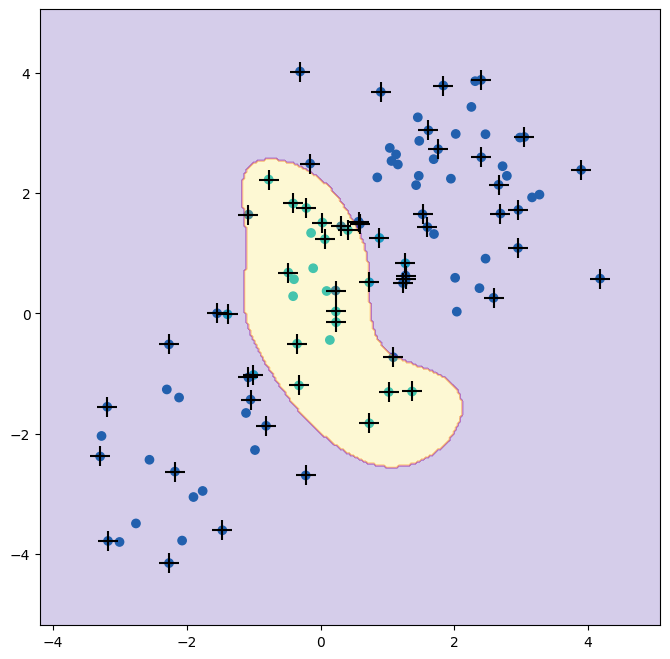

In [21]:
## Randomly split into training and testing groups
## Fit using a radial kernel and an gamma = 1

(X_train,
X_test,
y_train,
y_test) = skm.train_test_split(X,
y,
test_size=0.5,
random_state=0)
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
y_train,
svm_rbf,
ax=ax)

In [22]:
## There are more training errors than we'd like
## If we increase the value of C, we reduce training error but likely increase variance
## Perform CV using GridSearch to select best choice for Gamma 

kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
{'C':[0.1,1,10,100,1000],
'gamma':[0.5,1,2,3,4]},
refit=True,
cv=kfold,
scoring='accuracy');
grid.fit(X_train, y_train)
grid.best_params_

{'C': 100, 'gamma': 1}

Truth,1,2
Predicted,,
1,70,9
2,5,16


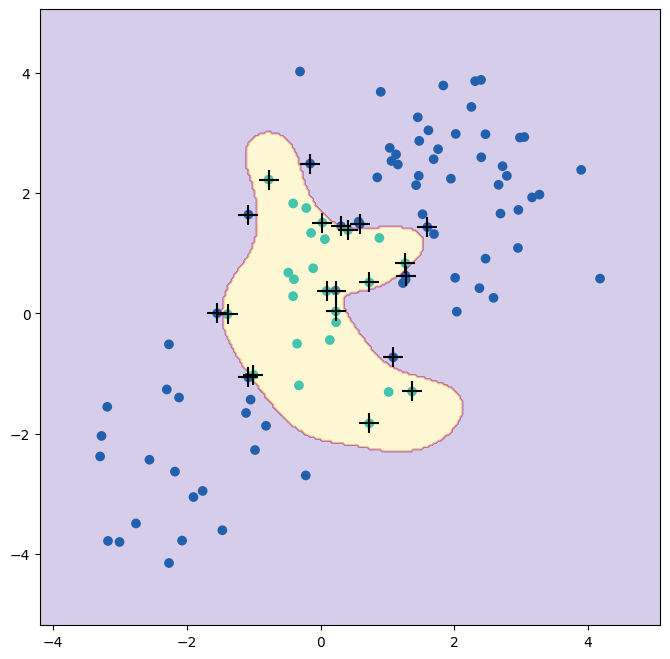

In [23]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
best_svm,
ax=ax)
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)